In [122]:
from __future__ import division
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


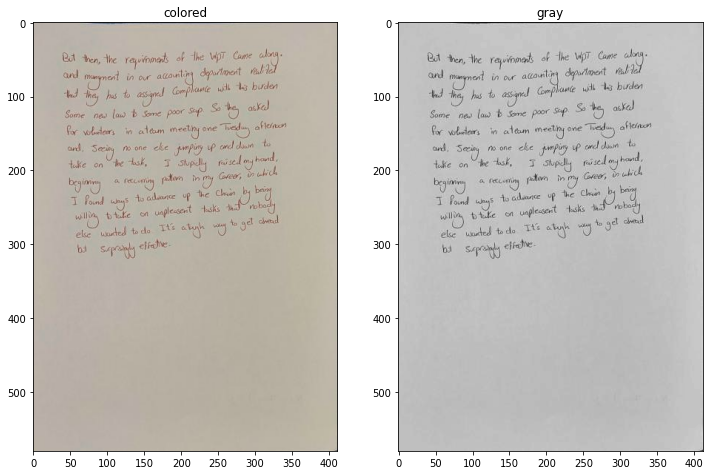

In [123]:
# Read the image and convert to gray then plot
image = cv2.imread("text4.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_images([image , gray],["colored" ,"gray"])

In [124]:
# # applying local thresholding
# half_length =  int(gray.shape[1]/2)
# half_width  =  int(gray.shape[0]/2)

# print("images after divide to 4 quarters")

# top_left_quarter =  np.copy(gray[10:50,10:40])

# top_right_quarter = gray[0:half_width,half_length:]
# down_left_quarter = gray[half_width:,0:half_length]
# down_right_quarter =gray[half_width:,half_length:]

# show_images([top_left_quarter,top_right_quarter])
# show_images([down_left_quarter,down_right_quarter])


# top_left_thresholded  = top_left_quarter >getThreshold(top_left_quarter)+5
# top_right_thresholded = top_right_quarter>getThreshold(top_right_quarter)
# down_left_thresholded = down_left_quarter>getThreshold(down_left_quarter)
# down_right_thresholded= down_right_quarter>getThreshold(down_right_quarter)
# show_images([top_left_thresholded])

# # thresholded = np.block([[top_left_thresholded,top_right_thresholded],[down_left_thresholded,down_right_thresholded]])
# # show_images([thresholded])
# # list = [top_left_thresholded,top_right_thresholded,down_left_thresholded,down_right_thresholded]

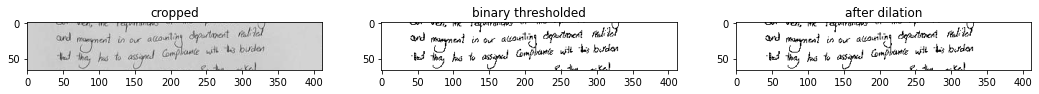

In [132]:
# crop the image :
height = gray.shape[0]
width  = gray.shape[1]
slice  = (int)(height/5)
cropped_image =  np.copy(gray[50:slice,:])

# get the threshold of the cropped image and apply to obtain the binary image.
thresh = getThreshold(cropped_image)
binary_image = cv2.threshold(cropped_image, thresh, 255, cv2.THRESH_BINARY)[1]


# Creating kernel for dilation:
dilated_image = binary_image
# img =cv2.bitwise_not(binary_image)
# kernel = np.ones((0, 0))
# dilated_image = cv2.dilate(img, kernel) 
# dilated_image = cv2.bitwise_not(dilated_image)
show_images([cropped_image , binary_image , dilated_image],["cropped","binary thresholded","after dilation"])

In [126]:
for i, row in enumerate(dilated_image):
    for j, value in enumerate(row):
        if value == 0:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(0, 2) 0


In [127]:
directions = [0, 1, 2,
              7,    3,
              6, 5, 4]
dir2idx = dict(zip(directions, range(len(directions))))
print(dir2idx)
change_j = [-1, 0, 1,  # x or columns
            -1,    1,
            -1, 0, 1]

change_i = [-1, -1, -1,  # y or rows
            0,      0,
            1, 1, 1]

border = []
chain = []
curr_point = start_point

for direction in directions:
    print(direction)
    idx = dir2idx[direction]
    print(idx)
    new_point = (start_point[0] + change_i[idx], start_point[1] + change_j[idx])
    print(curr_point,new_point)
    if dilated_image[new_point] != 0:  # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0

while curr_point != start_point:
    # figure direction to start search
    b_direction = (direction + 5) % 8

    # if (direction % 2 == 0):
    #     b_direction = (direction + 7) % 8
    # else:
    #     b_direction = (direction + 6) % 8

    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0] + change_i[idx], curr_point[1] + change_j[idx])
        try:
            if dilated_image[new_point] != 0:  # if is ROI
                border.append(new_point)
                chain.append(direction)
                curr_point = new_point
                break
        except:
            continue

    if count == 100000: break
    count += 1


{0: 0, 1: 1, 2: 2, 7: 3, 3: 4, 6: 5, 5: 6, 4: 7}
0
0
(0, 2) (-1, 1)


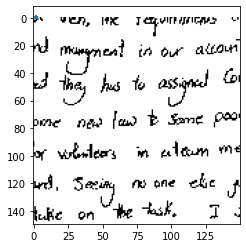

In [128]:
# print(count)
# print(chain)
plt.imshow(dilated_image)
plt.plot([i[1] for i in border], [i[0] for i in border])


C:\Users\Menna\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


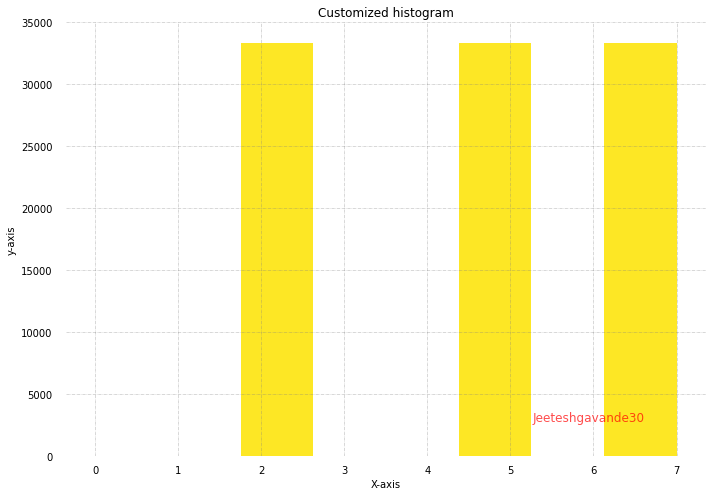

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


N_points = 10000
n_bins = 8



# Creating histogram
fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)


# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
axs.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.6)

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30',
		fontsize = 12,
		color ='red',
		ha ='right',
		va ='bottom',
		alpha = 0.7)

# Creating histogram
N, bins, patches = axs.hist(chain, bins = n_bins)

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
	color = plt.cm.viridis(norm(thisfrac))
	thispatch.set_facecolor(color)

# Adding extra features
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Customized histogram')

# Show plot
plt.show()


In [130]:
# print(border)
# points = np.asarray([(6, 60), (7, 60), (8, 60), (9, 61), (9, 62), (8, 63), (8, 64), (7, 65), (7, 66), (7, 67), (8, 68), (9, 68), (10, 68), (11, 68), (12, 68), (13, 67), (14, 66), (15, 65), (16, 65), (17, 64), (17, 63), (18, 62), (19, 62), (20, 61), (21, 62), (22, 63), (21, 64), (20, 65), (19, 66), (18, 67), (18, 68), (18, 69), (17, 70), (16, 71), (15, 72), (14, 72), (13, 73)] )
# # points.dtype => 'int64'
# cv2.polylines(img,[points], 1, (255,255,255))

# winname = 'example'
# cv2.namedWindow(winname)
# cv2.imshow(winname, img)
# cv2.waitKey()
# cv2.destroyWindow(winname)
